In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/data_dbscan.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

So we have some null values in the Maximum Payments column. So just fill these values with the average values and also remove the customer id column as it is useless

In [4]:
data = data.drop('CUST_ID', axis=1)
data.fillna(data.mean(), inplace=True)

Now let’s scale and normalize the dataset

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

from sklearn.preprocessing import normalize

x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

Now implement the Principal Component Analysis (PCA) algorithm in machine learning to reduce the dimensionality of the data for visualization

In [6]:
pca = PCA(n_components=2)

x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)

x_principal.columns = ['V1', 'V2']

print(x_principal.head())

         V1        V2
0 -0.489826 -0.679678
1 -0.518792  0.545016
2  0.330886  0.268971
3 -0.482375 -0.092101
4 -0.563289 -0.481916


Now let’s implement the DBSCAN algorithm and have a look at the data and the clusters after implementing it

In [7]:
dbscan = DBSCAN(eps=0.036, min_samples=4).fit(x_principal)

labels = dbscan.labels_
data['cluster'] = dbscan.labels_

print(data.tail())

         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945   28.493517           1.000000     291.12              0.00   
8946   19.183215           1.000000     300.00              0.00   
8947   23.398673           0.833333     144.40              0.00   
8948   13.457564           0.833333       0.00              0.00   
8949  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                

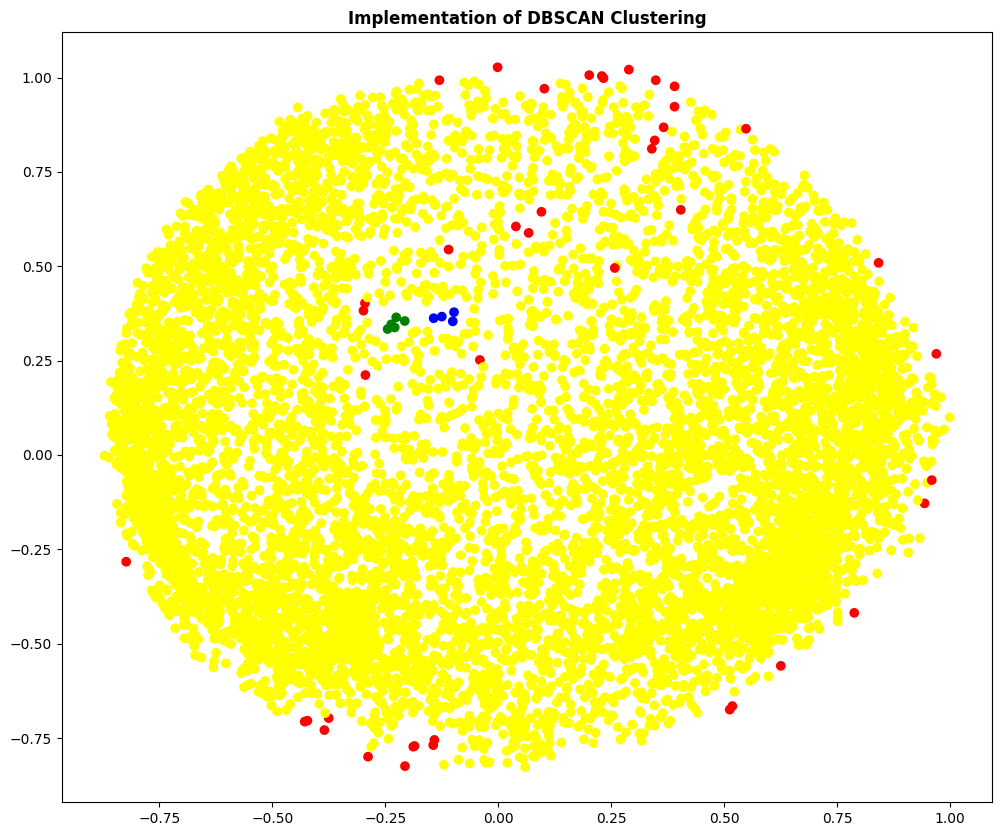

In [8]:
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red'}
colors = [clusterColor[label] for label in labels]

plt.figure(figsize=(12, 10))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()